## Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import wrangle

In [2]:
train, validate, test= wrangle.wrangle_telco()

In [24]:
train.shape, validate.shape,test.shape

((1224, 3), (216, 3), (255, 3))


## <li>Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .


In [5]:
m_scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
m_scaler.fit(train)

m_x_train_scaled = m_scaler.transform(train)
m_x_validate_scaled = m_scaler.transform(validate)
m_x_test_scaled = m_scaler.transform(test)

In [6]:
s_scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
s_scaler.fit(train)

s_x_train_scaled = s_scaler.transform(train)
s_x_validate_scaled = s_scaler.transform(validate)
s_x_test_scaled = s_scaler.transform(test)

In [7]:
r_scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
r_scaler.fit(train)

r_x_train_scaled = r_scaler.transform(train)
r_x_validate_scaled = r_scaler.transform(validate)
r_x_test_scaled = r_scaler.transform(test)

Text(0.5, 1.0, 'Robust Scaled')

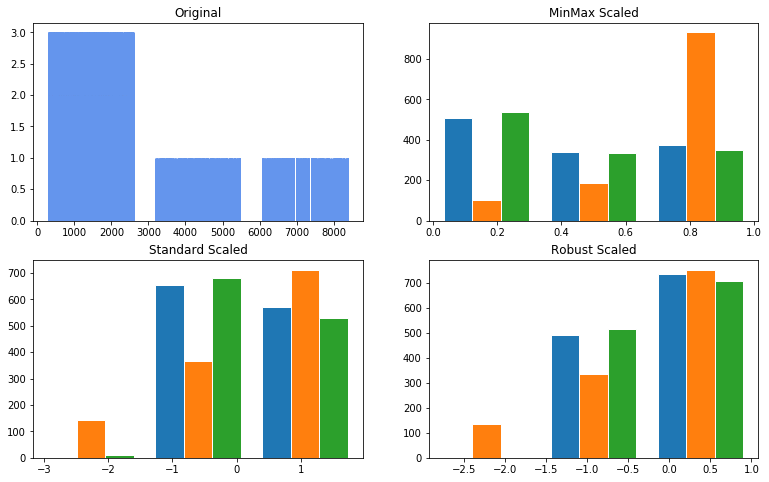

In [8]:
plt.figure(figsize=(13, 8))
plt.subplot(221)
plt.hist(train, bins=3, ec='cornflowerblue')
plt.title('Original')
plt.subplot(222)
plt.hist(m_x_train_scaled, bins=3, ec="white")
plt.title('MinMax Scaled')
plt.subplot(223)
plt.hist(s_x_train_scaled, bins=3, ec="white")
plt.title('Standard Scaled')
plt.subplot(224)
plt.hist(r_x_train_scaled, bins=3, ec='white')
plt.title('Robust Scaled')

## <li> Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [9]:
s_train, s_validate, s_test = wrangle.add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.StandardScaler(),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)

In [10]:
s_scaler=sklearn.preprocessing.StandardScaler()
s_scaler.fit(s_train[['tenure']])
s_train['tenure_inverse'] = s_scaler.inverse_transform(s_train[['tenure_scaled']])
s_validate['tenure_inverse'] = s_scaler.inverse_transform(s_validate[['tenure_scaled']])
s_test['tenure_inverse'] = s_scaler.inverse_transform(s_test[['tenure_scaled']])

In [11]:
# inverse transform returns a float instead of int
s_train.head()
s_train.dtypes

monthly_charges           float64
tenure                      int64
total_charges             float64
monthly_charges_scaled    float64
total_charges_scaled      float64
tenure_scaled             float64
tenure_inverse            float64
dtype: object

<li>Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [12]:
qtrain, qvalidate, qtest = wrangle.add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.QuantileTransformer(output_distribution='normal'),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)
qtrain.head()

,monthly_charges,tenure,total_charges,monthly_charges_scaled,total_charges_scaled,tenure_scaled
1540,20.80,58,1212.25,-0.758622,-0.737753,-0.312376
1187,104.00,69,7028.50,0.979511,1.101514,0.368215
1106,20.75,58,1185.95,-0.766391,-0.769392,-0.312376
909,85.90,66,5595.30,0.517790,0.512838,0.098013
1271,118.75,72,8672.45,5.199338,5.199338,5.199338


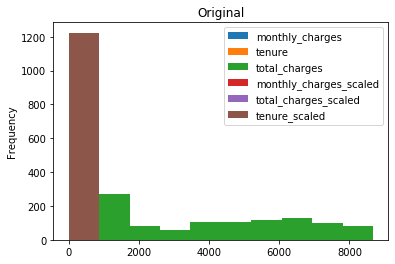

In [13]:
qtrain.plot.hist(title="Original")

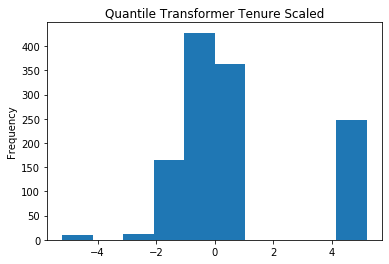

In [14]:
qtrain.tenure_scaled.plot.hist(title='Quantile Transformer Tenure Scaled' )

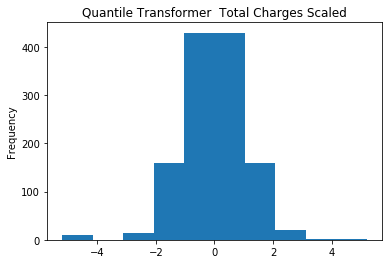

In [15]:
qtrain.total_charges_scaled.plot.hist(title='Quantile Transformer  Total Charges Scaled')

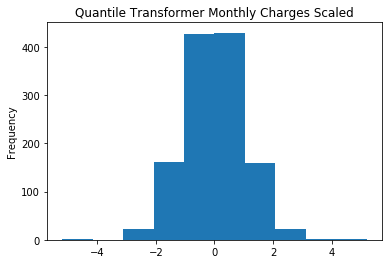

In [16]:
qtrain.monthly_charges_scaled.plot.hist(title='Quantile Transformer Monthly Charges Scaled')

## Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [17]:
qttrain, qtvalidate, qttest = wrangle.add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.QuantileTransformer(),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)
qttrain.head()

,monthly_charges,tenure,total_charges,monthly_charges_scaled,total_charges_scaled,tenure_scaled
1540,20.80,58,1212.25,0.224039,0.230332,0.377377
1187,104.00,69,7028.50,0.836336,0.864664,0.643644
1106,20.75,58,1185.95,0.221722,0.220830,0.377377
909,85.90,66,5595.30,0.697698,0.695968,0.539039
1271,118.75,72,8672.45,1.000000,1.000000,1.000000


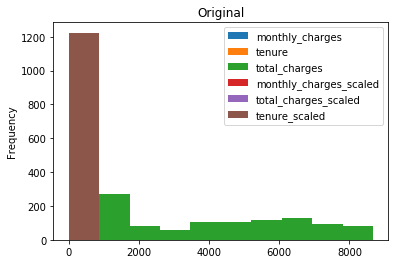

In [18]:
qttrain.plot.hist(title="Original")

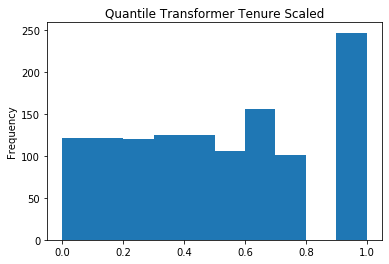

In [19]:
qttrain.tenure_scaled.plot.hist(title='Quantile Transformer Tenure Scaled')

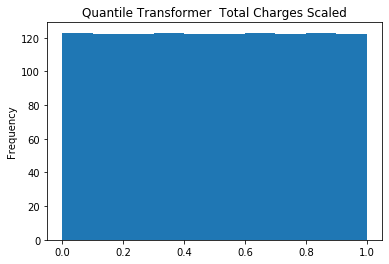

In [20]:
qttrain.total_charges_scaled.plot.hist(title='Quantile Transformer  Total Charges Scaled')

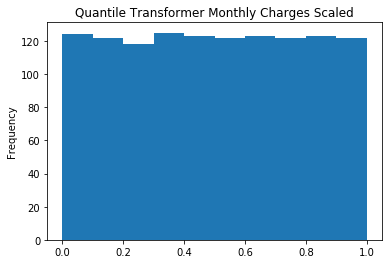

In [21]:
qttrain.monthly_charges_scaled.plot.hist(title='Quantile Transformer Monthly Charges Scaled')

## Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!
</ol>

In [ ]:
def scaled_telco(train, validate, test):
    '''This function takes in a train, validate and test and returns a min, max scaled version of each.'''
    train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.MinMaxScaler(),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
    )
    return train, validate, test